# Ground stations observations

The aim of this notebook is to indicate how to read the data of ground stations. The french network of meteorological ground stations calls RADOME. The time step of data is 6 minutes hence the name 'RADOME6M' in the file names. 
Each file contains 10 to 11 days of 6 minutes data (each month is separated in 3 files) per geographic zone ('NW' for North-West of France and 'SE' for South-East of France). 

For some distributions, this installation of basemap (as discribed in Readme.md) is not sufficient. 
It it is needed to install *basemap-data-hires* doing 
```sh
conda install basemap-data-hires
```

Data overview :

Parameters about the metadata of ground stations:
<ul>
    <li>number_sta : number of the ground station (number from the original database)</li>
    <li>lat : latitude into decimal degrees</li>
    <li>lon : longitude into decimal degrees</li>    
    <li>height_sta : height into meters</li>    
</ul>
Then, the date parameter is a datetime object with the format 'YYYY-MM-DD HH:mm:ss'.
The meteorological parameters are as follows:
<ul>
    <li>dd : wind direction into degrees</li>
    <li>ff : wind speed into m.s<sup>-1</sup></li>
    <li>precip : precipitation during the reporting period into kg.m<sup>2</sup></li>
    <li>hu : humidity into %</li>    
    <li>td : dew point temperature into Kelvin</li> 
    <li>t : temperature into Kelvin</li> 
    <li>psl : pressure reduced to sea level into Pa</li>    
</ul>

In [1]:
from data_exploration.utils.user_configuration import *

In [2]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm

In [42]:
####Cell containing the modifiable fields######
zone = 'SE'      #study zone
date = '2016-01-01T06:00:00'    #study date (for the plot example)
param = 'hu'      #study parameter (for the plot example)

In [43]:
study_date = pd.Timestamp(date)  #study date (for the plot example)

In [44]:
# Have a look at df
fname = "../data_sample/ground_stations/%s_20160101.csv"%zone
df =pd.read_csv(fname,parse_dates=[4],infer_datetime_format=True)
display(df.head())
display(df.tail())

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
0,1027003,45.83,5.11,196.0,2016-01-01,NaN,NaN,NaN,98.0,278.75,279.05,NaN
1,1033002,46.09,5.81,350.0,2016-01-01,0.0,0.0,0.0,99.0,278.25,278.35,NaN
2,1034004,45.77,5.69,330.0,2016-01-01,0.0,0.0,0.0,100.0,279.15,279.15,NaN
3,1072001,46.20,5.29,260.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,276.55,NaN
4,1089001,45.98,5.33,252.0,2016-01-01,0.0,0.0,0.0,95.0,278.85,279.55,102720.0


,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
111618,84085004,43.94000,5.23000,488.0,2016-01-01 23:54:00,100.0,2.0,0.0,94.0,280.05,280.95,NaN
111619,84086001,43.81000,5.15000,672.0,2016-01-01 23:54:00,140.0,7.6,0.0,93.0,279.65,280.75,NaN
111620,84087001,44.14000,4.86000,55.0,2016-01-01 23:54:00,130.0,5.0,0.0,76.0,281.25,285.35,101760.0
111621,84107002,44.04067,5.49283,836.0,2016-01-01 23:54:00,120.0,3.8,0.2,99.0,278.55,278.65,NaN
111622,84150001,44.34000,4.91000,141.0,2016-01-01 23:54:00,110.0,3.1,0.0,82.0,281.85,284.85,NaN


In [45]:
print("Type of datas \n\n%s" % df.dtypes)

Type of datas 

number_sta             int64
lat                  float64
lon                  float64
height_sta           float64
date          datetime64[ns]
dd                   float64
ff                   float64
precip               float64
hu                   float64
td                   float64
t                    float64
psl                  float64
dtype: object


### Plot a parameter for a given date 

In [46]:
#Get the data for the study date
d_sub = df[df['date'] == study_date]
# Show a subsection of data selected
display(d_sub.head())
display(d_sub.tail())

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
28830,1027003,45.83,5.11,196.0,2016-01-01 06:00:00,NaN,NaN,NaN,99.0,276.45,276.55,NaN
28831,1033002,46.09,5.81,350.0,2016-01-01 06:00:00,360.0,0.5,0.0,99.0,276.25,276.35,NaN
28832,1034004,45.77,5.69,330.0,2016-01-01 06:00:00,360.0,1.2,0.0,100.0,277.15,277.15,NaN
28833,1072001,46.20,5.29,260.0,2016-01-01 06:00:00,NaN,NaN,0.0,NaN,NaN,272.95,NaN
28834,1089001,45.98,5.33,252.0,2016-01-01 06:00:00,40.0,1.2,0.0,97.0,276.75,277.15,102700.0


,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
29291,84086001,43.81000,5.15000,672.0,2016-01-01 06:00:00,50.0,1.8,0.0,98.0,279.15,279.45,NaN
29292,84087001,44.14000,4.86000,55.0,2016-01-01 06:00:00,330.0,2.1,0.0,97.0,280.45,280.85,102470.0
29293,84094001,44.29000,5.13000,392.0,2016-01-01 06:00:00,0.0,0.0,0.0,95.0,278.65,279.35,NaN
29294,84107002,44.04067,5.49283,836.0,2016-01-01 06:00:00,260.0,1.3,0.0,98.0,275.65,275.95,NaN
29295,84150001,44.34000,4.91000,141.0,2016-01-01 06:00:00,20.0,2.0,0.0,95.0,279.95,280.75,NaN


<IPython.core.display.Javascript object>


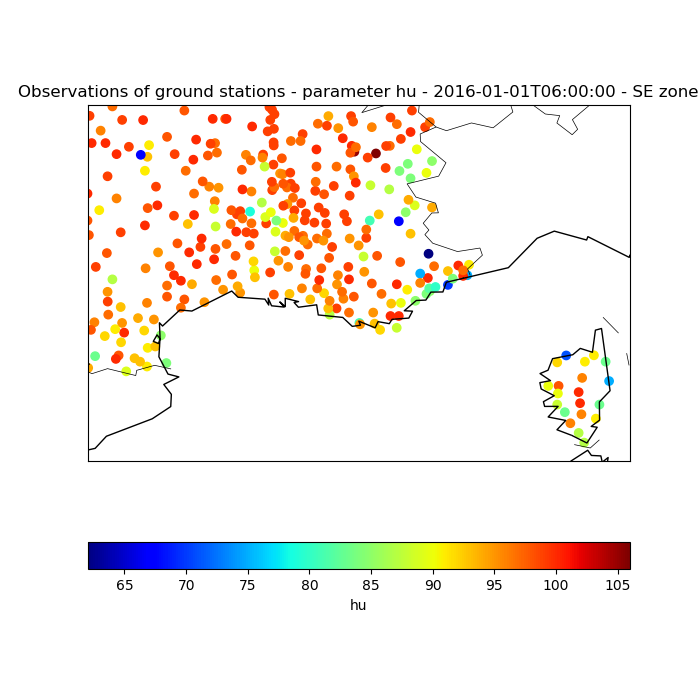

C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [47]:
#plot the data
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

#coordinates of study zone boundaries
lllat = DOMAINS[zone]['lry']  #lower left latitude
urlat = DOMAINS[zone]['uly']  #upper right latitude
lllon = DOMAINS[zone]['ulx']  #lower left longitude
urlon = DOMAINS[zone]['lrx']  #upper right longitude

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,
            resolution='l',
            llcrnrlat=lllat,
            urcrnrlat=urlat,
            llcrnrlon=lllon,
            urcrnrlon=urlon)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
x, y = m(d_sub['lon'], d_sub['lat'])
m.scatter(x, y, c=d_sub[param], cmap='jet')

plt.colorbar(orientation='horizontal').set_label(param)

plt.title("Observations of ground stations - parameter " + param + " - " +
          str(date) + " - " + zone + " zone")
plt.show()